# Agriculture Project

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

Read the csv data

In [2]:
df_train=pd.read_csv('train_agriculture.csv')
df_test=pd.read_csv('test_agriculture.csv')

In [3]:
df_train.head(2)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1


In [4]:
df_test.head(2)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2


In [5]:
df_train.shape, df_test.shape

((88858, 10), (1199, 9))

In [6]:
df_train.describe(include='all')

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
unique,88858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,F00000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,NaN,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,NaN,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,NaN,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,NaN,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000


In [7]:
df_test.describe(include='all')

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1080.000000,1199.000000,1199.000000
unique,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,F00000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,NaN,845.004912,0.395848,0.498213,0.522866,16.154101,12.782083,8.863634,0.685640
min,NaN,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,NaN,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,3.000000,2.000000
75%,NaN,1785.000000,0.000000,1.000000,3.000000,40.000000,38.000000,13.000000,2.000000


In [8]:
df_train.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [9]:
df_train.isna().sum()/df_train.shape[0]*100

ID                          0.00000
Estimated_Insects_Count     0.00000
Crop_Type                   0.00000
Soil_Type                   0.00000
Pesticide_Use_Category      0.00000
Number_Doses_Week           0.00000
Number_Weeks_Used          10.12852
Number_Weeks_Quit           0.00000
Season                      0.00000
Crop_Damage                 0.00000
dtype: float64

In [10]:
df_test.isna().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [11]:
df_test.isna().sum()/df_test.shape[0]*100

ID                         0.000000
Estimated_Insects_Count    0.000000
Crop_Type                  0.000000
Soil_Type                  0.000000
Pesticide_Use_Category     0.000000
Number_Doses_Week          0.000000
Number_Weeks_Used          9.924937
Number_Weeks_Quit          0.000000
Season                     0.000000
dtype: float64

<AxesSubplot:xlabel='Number_Weeks_Used'>

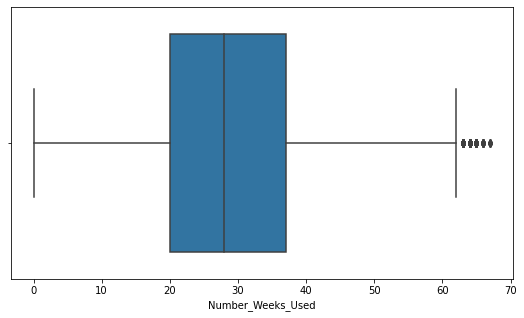

In [12]:
plt.figure(figsize=(9,5))
sns.boxplot('Number_Weeks_Used' , data=df_train)

<AxesSubplot:xlabel='Number_Weeks_Used'>

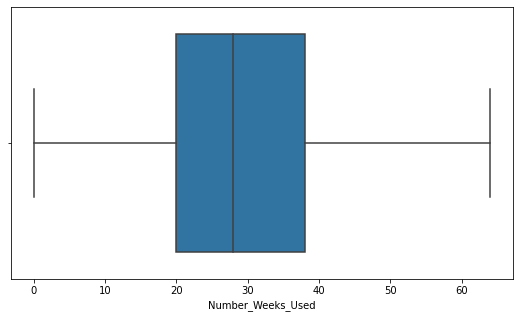

In [13]:
plt.figure(figsize=(9,5))
sns.boxplot('Number_Weeks_Used' , data=df_test)

In [14]:
df_train['Number_Weeks_Used'] = df_train['Number_Weeks_Used'].fillna(df_train['Number_Weeks_Used'].mean())

In [15]:
df_test['Number_Weeks_Used'] = df_test['Number_Weeks_Used'].fillna(df_test['Number_Weeks_Used'].mean())

In [16]:
df_train['Number_Weeks_Used'].value_counts()

28.62397    9000
20.00000    3878
30.00000    3765
25.00000    3120
40.00000    2707
            ... 
63.00000      50
64.00000      44
65.00000      31
66.00000      17
67.00000       8
Name: Number_Weeks_Used, Length: 65, dtype: int64

In [17]:
df_test['Number_Weeks_Used'].value_counts()

29.033333    119
20.000000     49
30.000000     48
25.000000     45
35.000000     44
22.000000     39
18.000000     37
28.000000     35
40.000000     32
16.000000     30
15.000000     30
34.000000     29
21.000000     27
24.000000     27
26.000000     27
23.000000     26
27.000000     26
36.000000     26
43.000000     23
31.000000     23
37.000000     22
32.000000     22
29.000000     21
14.000000     21
19.000000     21
50.000000     21
13.000000     18
0.000000      18
33.000000     17
45.000000     16
10.000000     16
41.000000     16
38.000000     16
12.000000     16
17.000000     16
49.000000     15
39.000000     14
42.000000     13
54.000000     12
46.000000     12
5.000000      12
44.000000     12
47.000000     12
51.000000      9
57.000000      8
52.000000      7
48.000000      7
59.000000      7
53.000000      7
6.000000       6
9.000000       5
11.000000      5
58.000000      4
56.000000      4
7.000000       3
55.000000      2
8.000000       2
64.000000      1
62.000000     

In [18]:
df_train['Number_Weeks_Used'] = df_train['Number_Weeks_Used'].fillna(df_train['Number_Weeks_Used'].mode()[0])

In [19]:
df_train.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [20]:
df_test['Number_Weeks_Used'] = df_test['Number_Weeks_Used'].fillna(df_test['Number_Weeks_Used'].mode()[0])

In [21]:
df_test.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [22]:
df_train.head(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [23]:
df_test.head(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,29.033333,0,2
1,F00000007,410,1,1,1,0,0.000000,0,2
2,F00000011,626,1,0,1,0,0.000000,0,2
3,F00000013,731,1,0,1,0,0.000000,0,2
4,F00000014,789,0,0,1,0,0.000000,0,1


In [24]:
df_train['Estimated_Insects_Count'].value_counts()

1212    3438
1132    3370
1478    3358
1385    3309
1056    3235
        ... 
3896     134
3515     123
4097     113
231       89
169       63
Name: Estimated_Insects_Count, Length: 71, dtype: int64

In [25]:
df_test['Estimated_Insects_Count'].value_counts()

1132    58
915     49
1056    48
1385    47
851     45
        ..
3896     2
3515     2
257      2
4096     1
3336     1
Name: Estimated_Insects_Count, Length: 70, dtype: int64

In [26]:
df_train['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [27]:
df_test['Season'].value_counts()

2    619
1    361
3    219
Name: Season, dtype: int64

In [28]:
df_train['Season'].value_counts()

2    44210
1    26902
3    17746
Name: Season, dtype: int64

In [29]:
df_train['Crop_Type'].value_counts()

0    63589
1    25269
Name: Crop_Type, dtype: int64

In [30]:
df_test['Crop_Type'].value_counts()

0    966
1    233
Name: Crop_Type, dtype: int64

In [31]:
df_train['Soil_Type'].value_counts()

0    48124
1    40734
Name: Soil_Type, dtype: int64

In [32]:
df_test['Soil_Type'].value_counts()

0    653
1    546
Name: Soil_Type, dtype: int64

In [33]:
df_train['Pesticide_Use_Category'].value_counts()

2    63709
3    24312
1      837
Name: Pesticide_Use_Category, dtype: int64

In [34]:
df_test['Pesticide_Use_Category'].value_counts()

2    695
3    482
1     22
Name: Pesticide_Use_Category, dtype: int64

<AxesSubplot:xlabel='Estimated_Insects_Count', ylabel='count'>

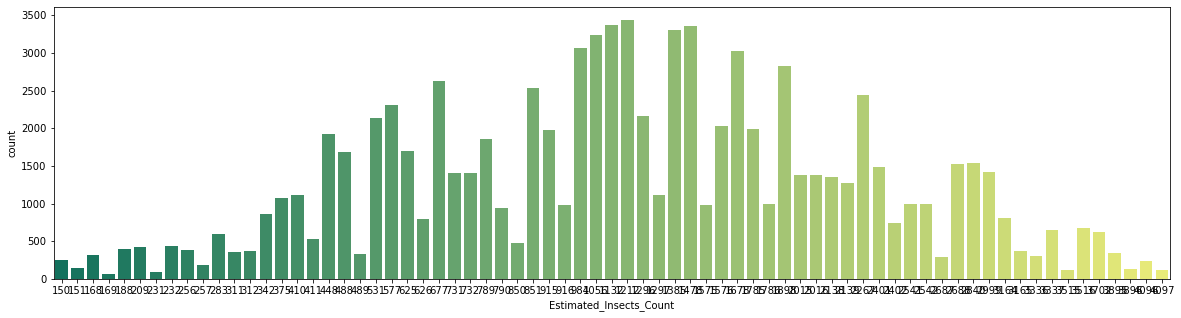

In [35]:
plt.figure(figsize=(20,5))
sns.countplot('Estimated_Insects_Count', data=df_train, palette='summer')

<AxesSubplot:xlabel='Estimated_Insects_Count', ylabel='count'>

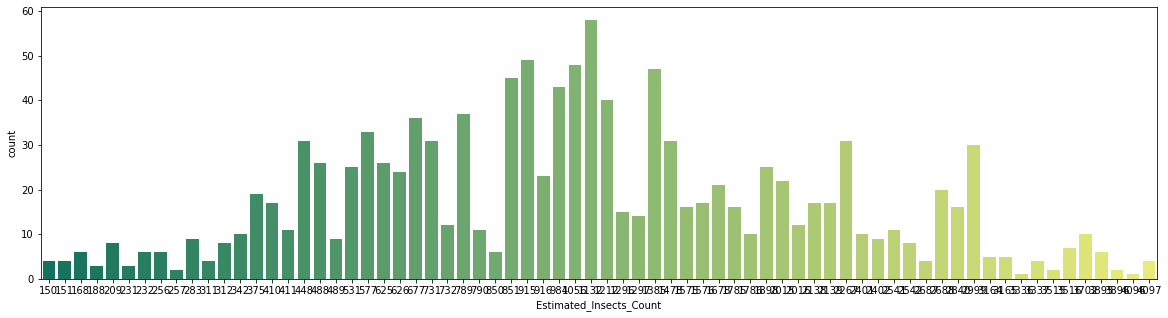

In [36]:
plt.figure(figsize=(20,5))
sns.countplot('Estimated_Insects_Count', data=df_test, palette='summer')

<AxesSubplot:xlabel='Crop_Type', ylabel='count'>

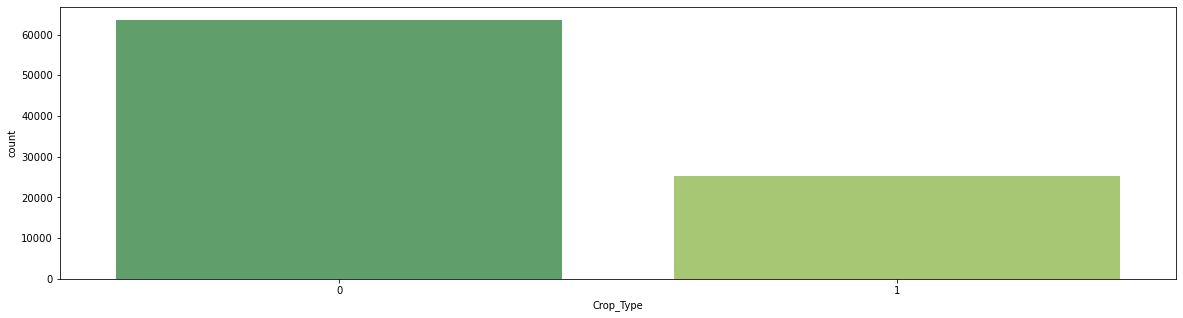

In [37]:
plt.figure(figsize=(20,5))
sns.countplot('Crop_Type', data=df_train, palette='summer')

<AxesSubplot:xlabel='Crop_Type', ylabel='count'>

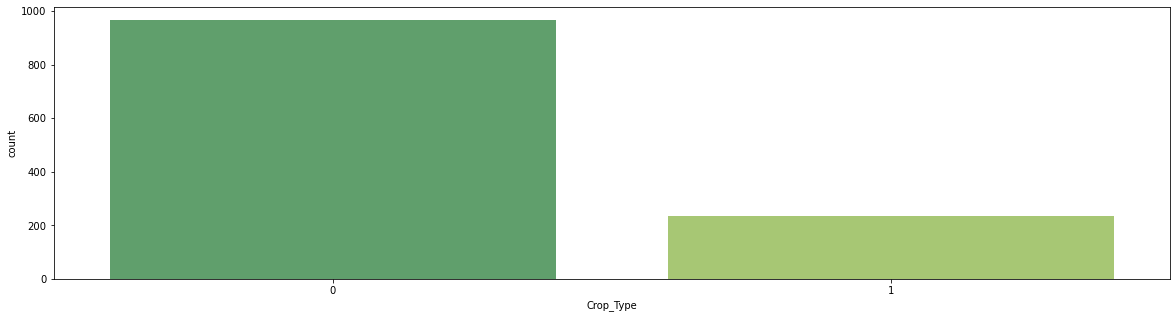

In [38]:
plt.figure(figsize=(20,5))
sns.countplot('Crop_Type', data=df_test, palette='summer')

<AxesSubplot:xlabel='Soil_Type', ylabel='count'>

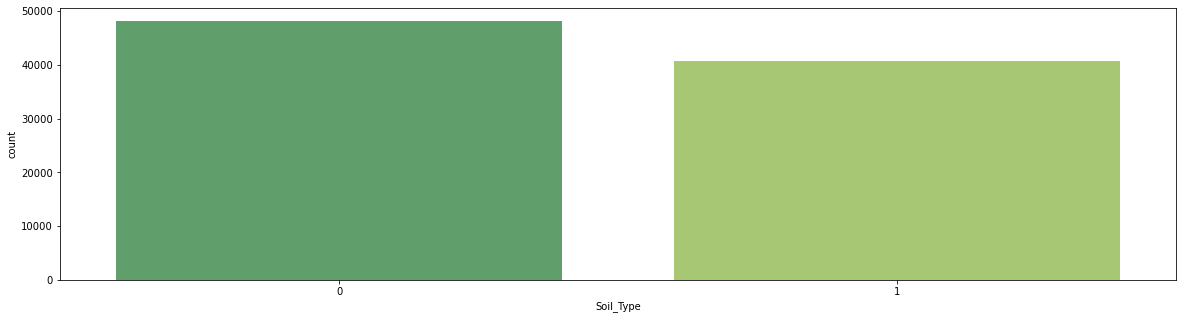

In [39]:
plt.figure(figsize=(20,5))
sns.countplot('Soil_Type', data=df_train, palette='summer')

<AxesSubplot:xlabel='Soil_Type', ylabel='count'>

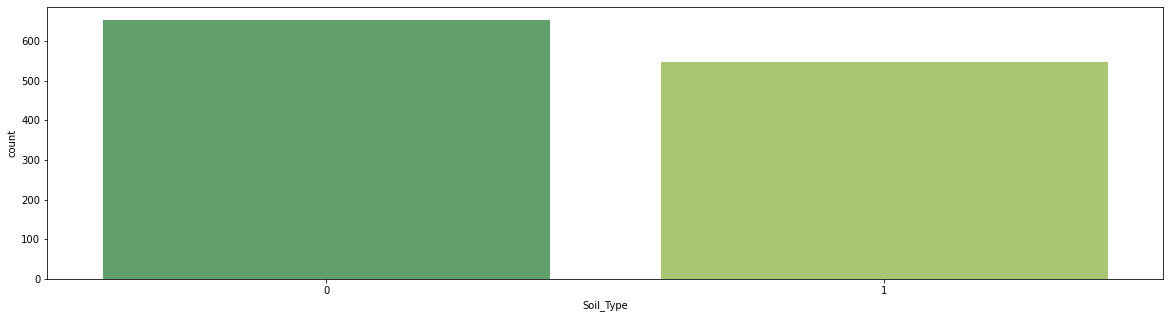

In [40]:
plt.figure(figsize=(20,5))
sns.countplot('Soil_Type', data=df_test, palette='summer')

<AxesSubplot:xlabel='Pesticide_Use_Category', ylabel='count'>

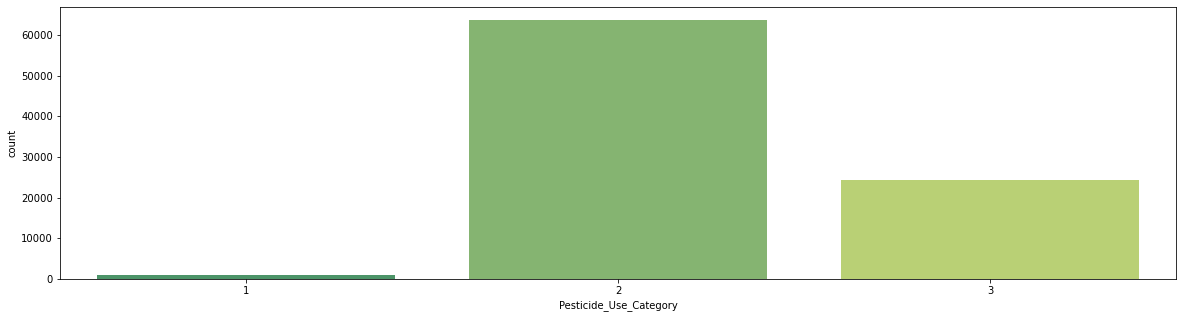

In [41]:
plt.figure(figsize=(20,5))
sns.countplot('Pesticide_Use_Category',data=df_train, palette='summer')

<AxesSubplot:xlabel='Pesticide_Use_Category', ylabel='count'>

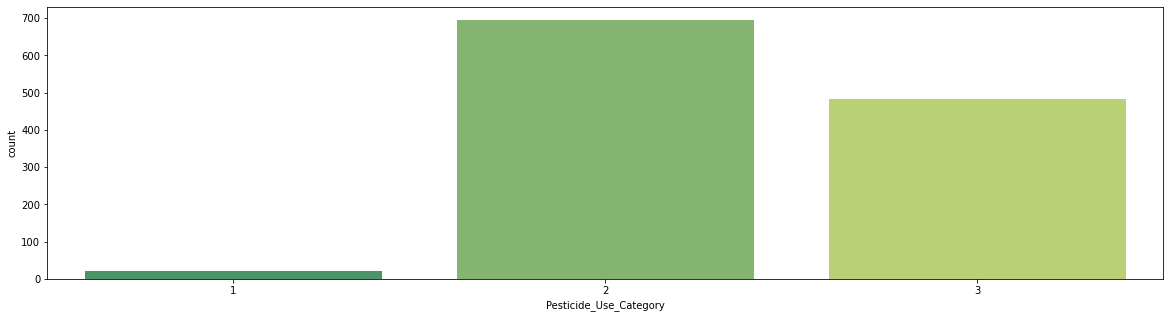

In [42]:
plt.figure(figsize=(20,5))
sns.countplot('Pesticide_Use_Category', data=df_test, palette='summer')

<AxesSubplot:xlabel='Season', ylabel='count'>

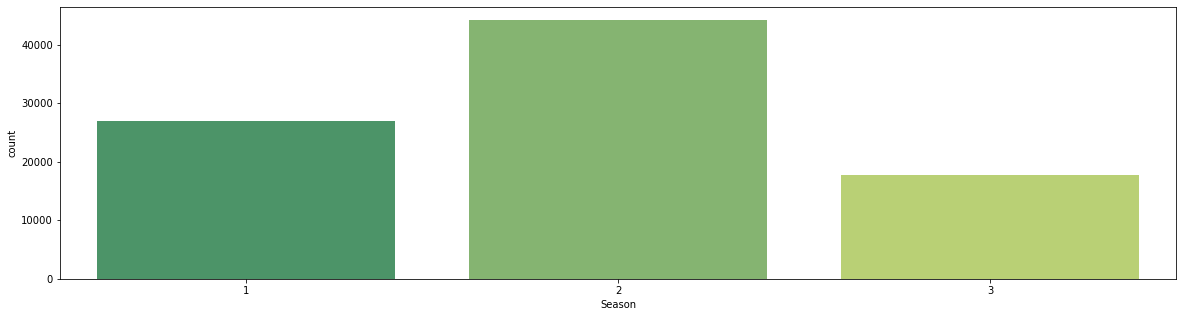

In [43]:
plt.figure(figsize=(20,5))
sns.countplot('Season',data=df_train, palette='summer')

<AxesSubplot:xlabel='Season', ylabel='count'>

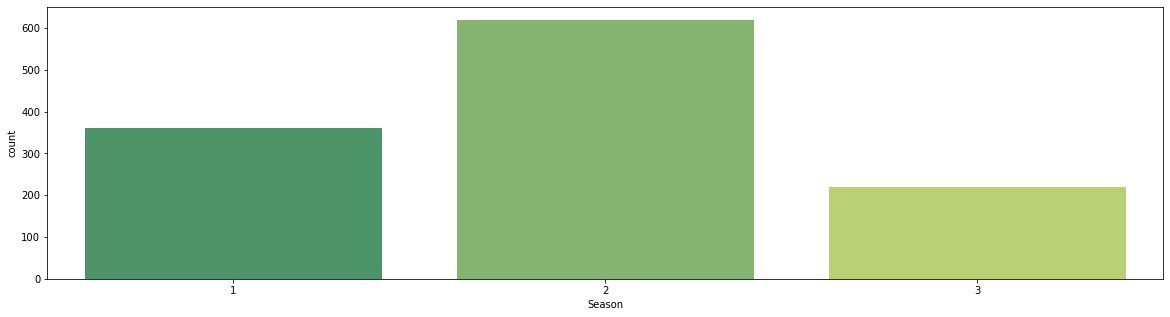

In [44]:
plt.figure(figsize=(20,5))
sns.countplot('Season', data=df_test, palette='summer')

<AxesSubplot:xlabel='Crop_Damage', ylabel='count'>

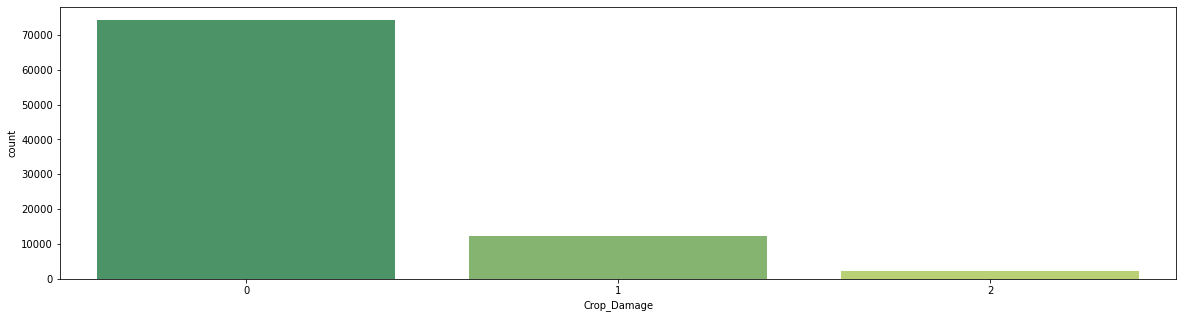

In [45]:
plt.figure(figsize=(20,5))
sns.countplot('Crop_Damage', data=df_train, palette='summer')

<AxesSubplot:xlabel='Number_Weeks_Used', ylabel='count'>

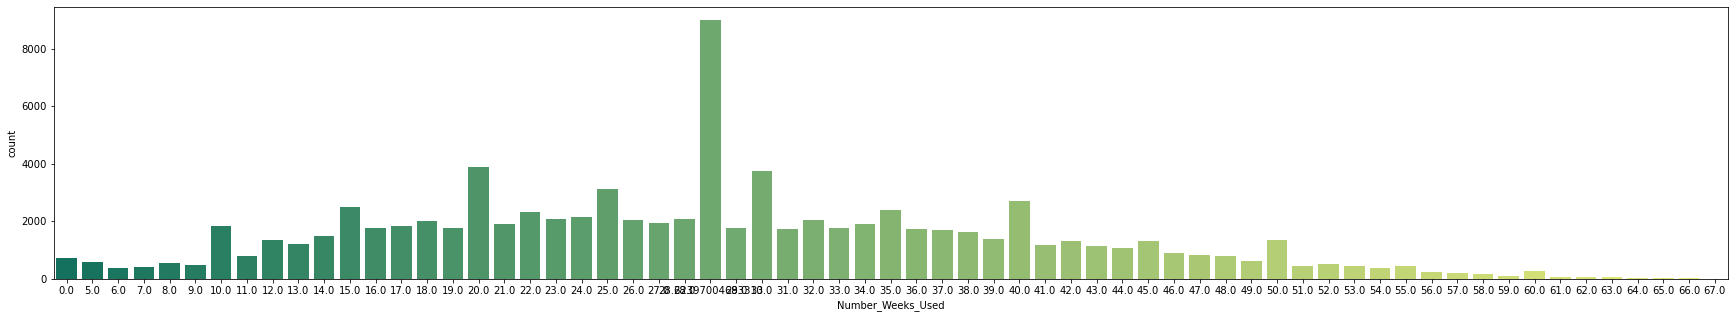

In [46]:
plt.figure(figsize=(30,5))
sns.countplot('Number_Weeks_Used', data=df_train, palette='summer')

<AxesSubplot:xlabel='Number_Weeks_Used', ylabel='count'>

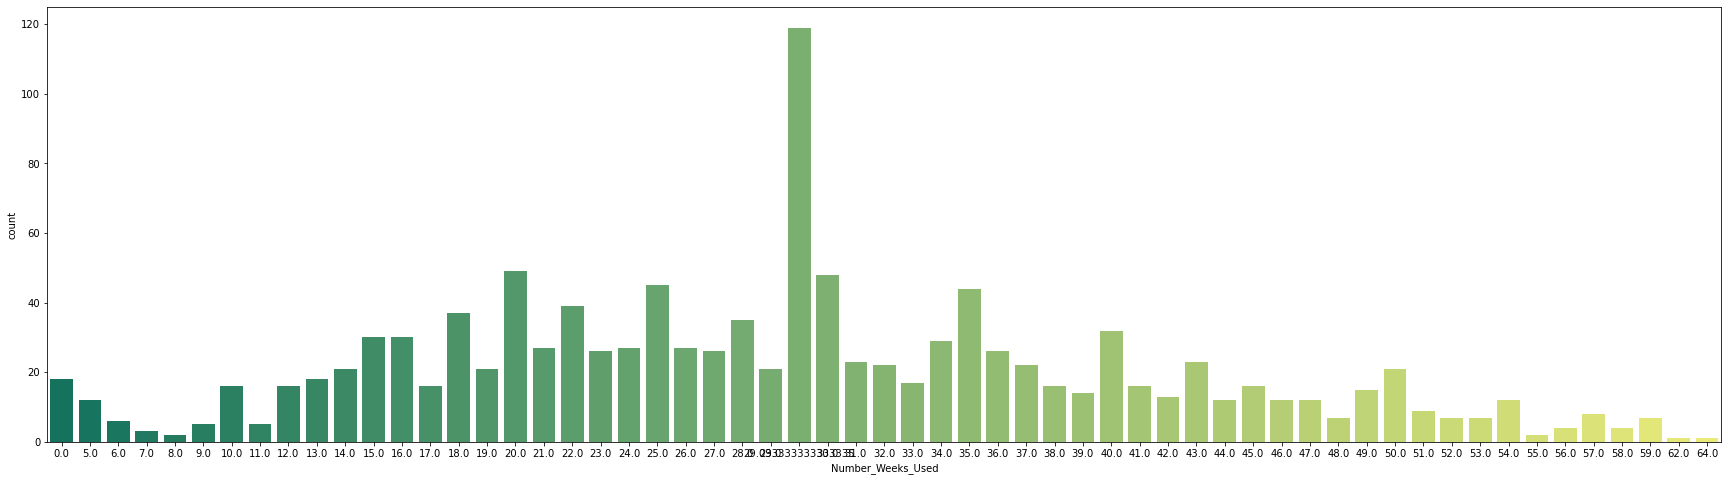

In [47]:
plt.figure(figsize=(30,8))
sns.countplot('Number_Weeks_Used', data=df_test, palette='summer')

Pesticide Use Category vs Number Weeks Used

<AxesSubplot:xlabel='Number_Weeks_Used', ylabel='Pesticide_Use_Category'>

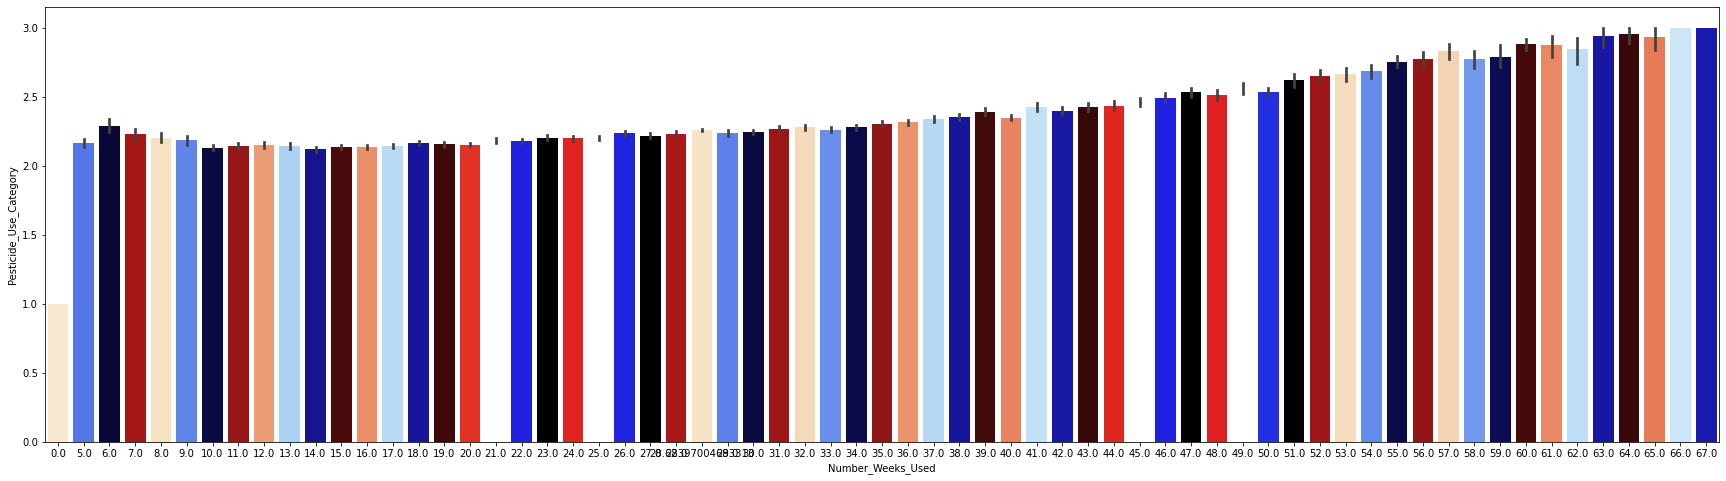

In [48]:
plt.figure(figsize=(30,8))
sns.barplot(y='Pesticide_Use_Category', x='Number_Weeks_Used', data=df_train, palette='flag')

 It is trying to compare between values of different categories in the data : It meant it is used to show how Pesticide use in the field about how many weeks.

<AxesSubplot:>

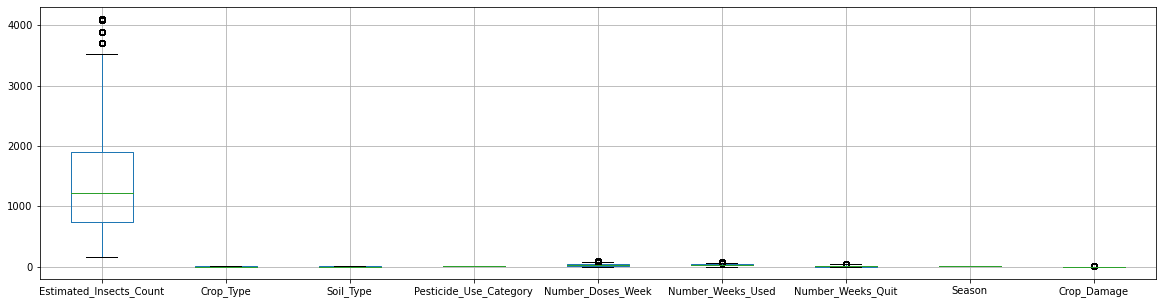

In [49]:
plt.figure(figsize=(20,5))
df_train.boxplot()

There are outliers present in the different categories: Estimated Insects Count, Number Doses Week, Number Weeks Used, Number Weeks Quit, Crop Damage  

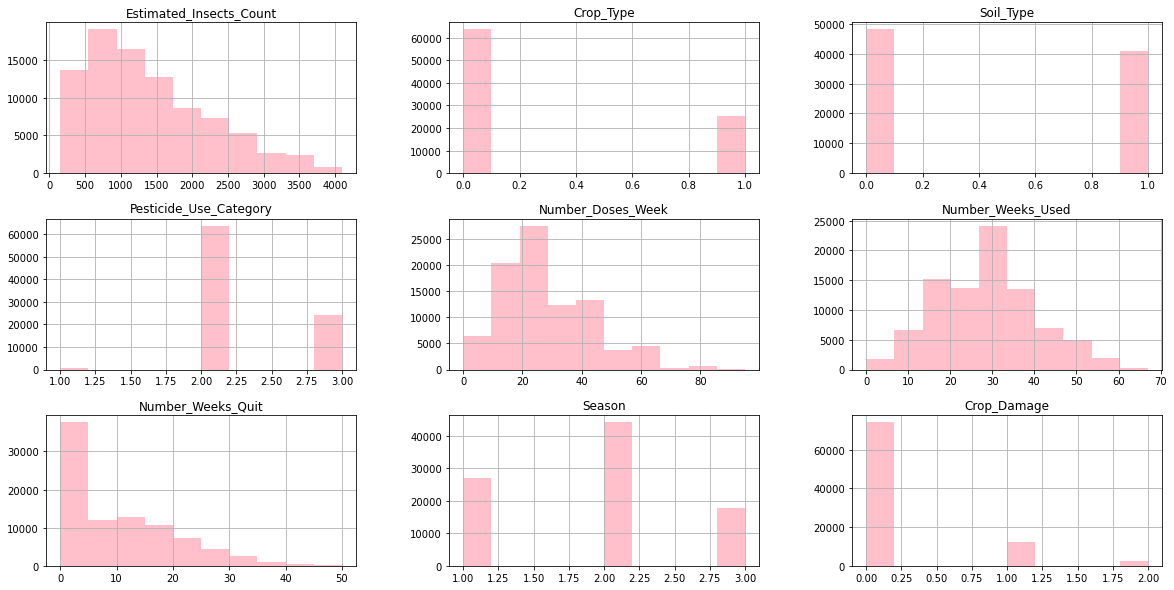

In [50]:
df_train.hist(color='pink',figsize=(20,10))
plt.show()

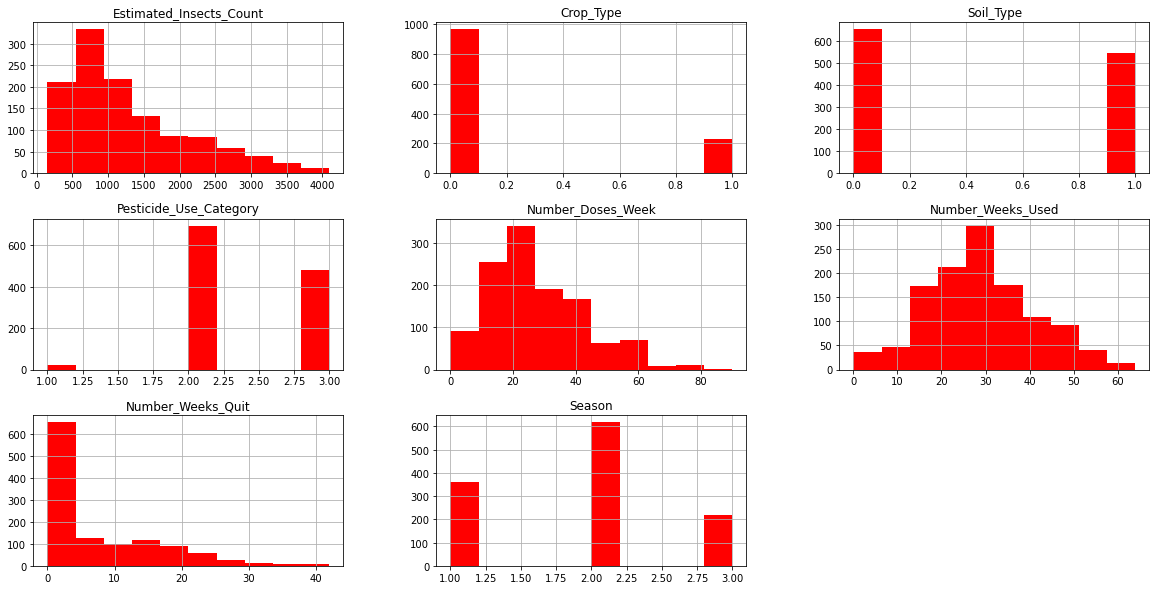

In [51]:
df_test.hist(color='red', figsize=(20,10))
plt.show()

GroupBy Method

- it visualize the data with the help of groupby method

here, Crop_Type, Soil_Type and 'Estimated_Insects_Count' are grouped together to show how they work to show the results

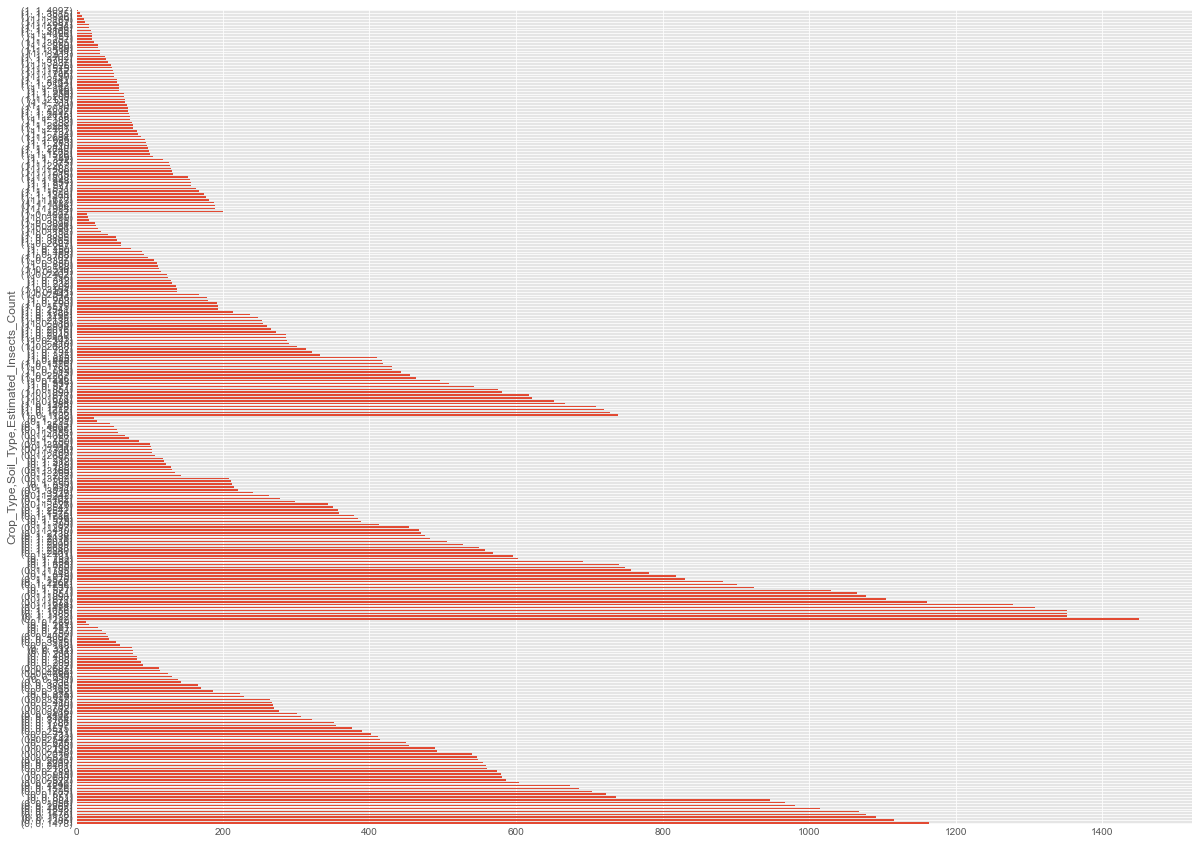

In [52]:
import matplotlib.style as style
style.use('seaborn-darkgrid')
style.use('ggplot')
df_train.groupby(['Crop_Type' , 'Soil_Type'])['Estimated_Insects_Count'].value_counts().plot(kind='barh', figsize=(20,15))
plt.xticks()
plt.xlabel(None)
plt.show()

here, Crop_Type, Soil_Type and 'Pesticide_Use_Category' are grouped together to show how they work to show the results

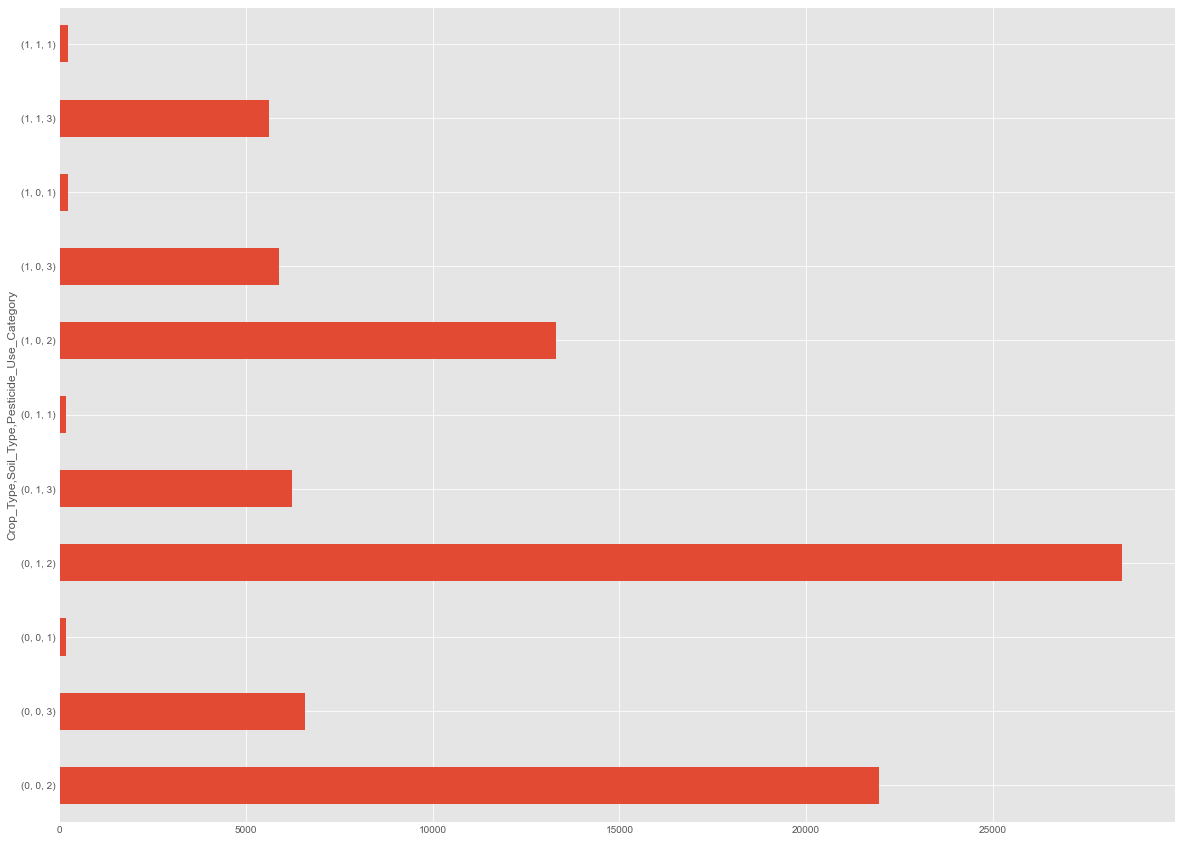

In [53]:
import matplotlib.style as style
style.use('seaborn-darkgrid')
style.use('ggplot')
df_train.groupby(['Crop_Type' , 'Soil_Type'])['Pesticide_Use_Category'].value_counts().plot(kind='barh', figsize=(20,15))
plt.xticks()
plt.xlabel(None)
plt.show()

here, Crop_Type, Soil_Type and 'Number_Weeks_Used' are grouped together to show how they work to show the results

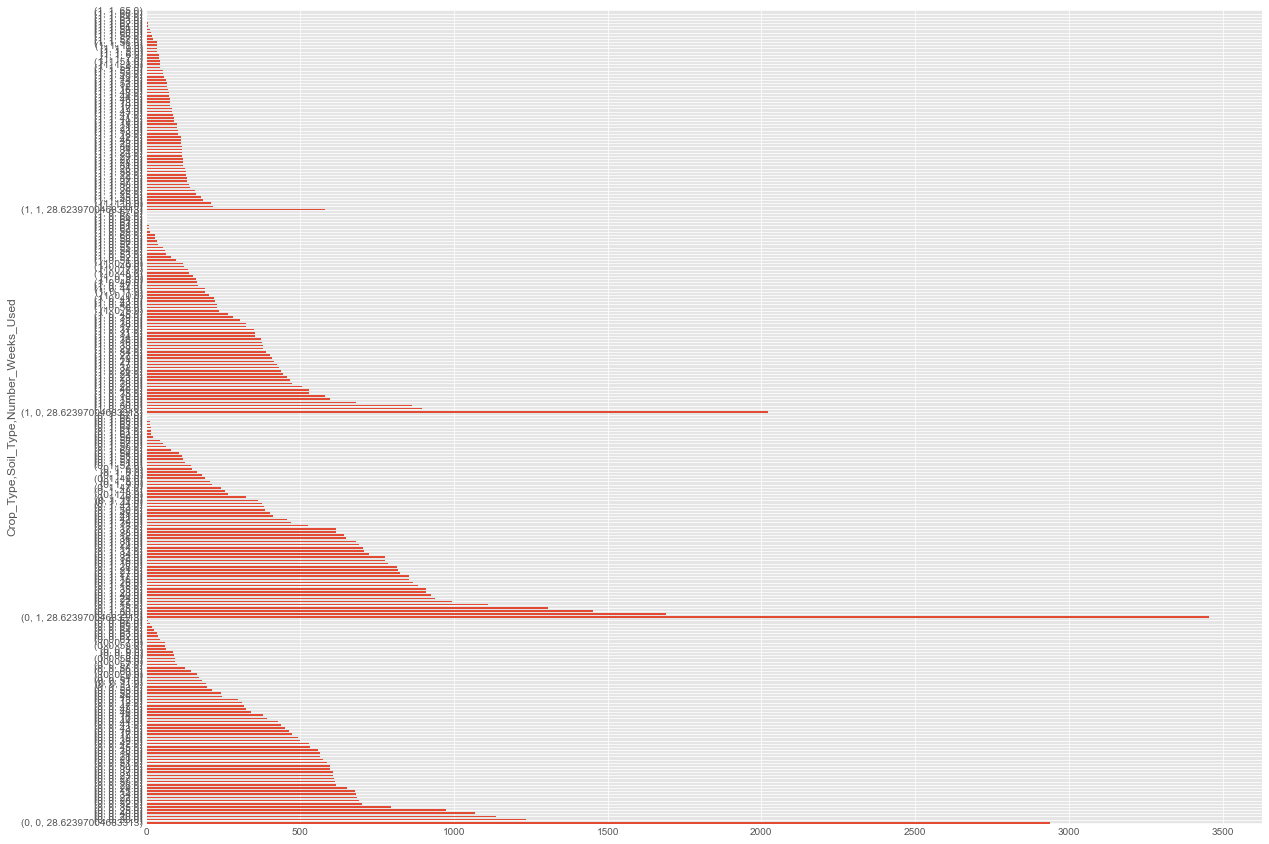

In [54]:
import matplotlib.style as style
style.use('seaborn-darkgrid')
style.use('ggplot')
df_train.groupby(['Crop_Type' , 'Soil_Type'])['Number_Weeks_Used'].value_counts().plot(kind='barh', figsize=(20,15))
plt.xticks()
plt.xlabel(None)
plt.show()

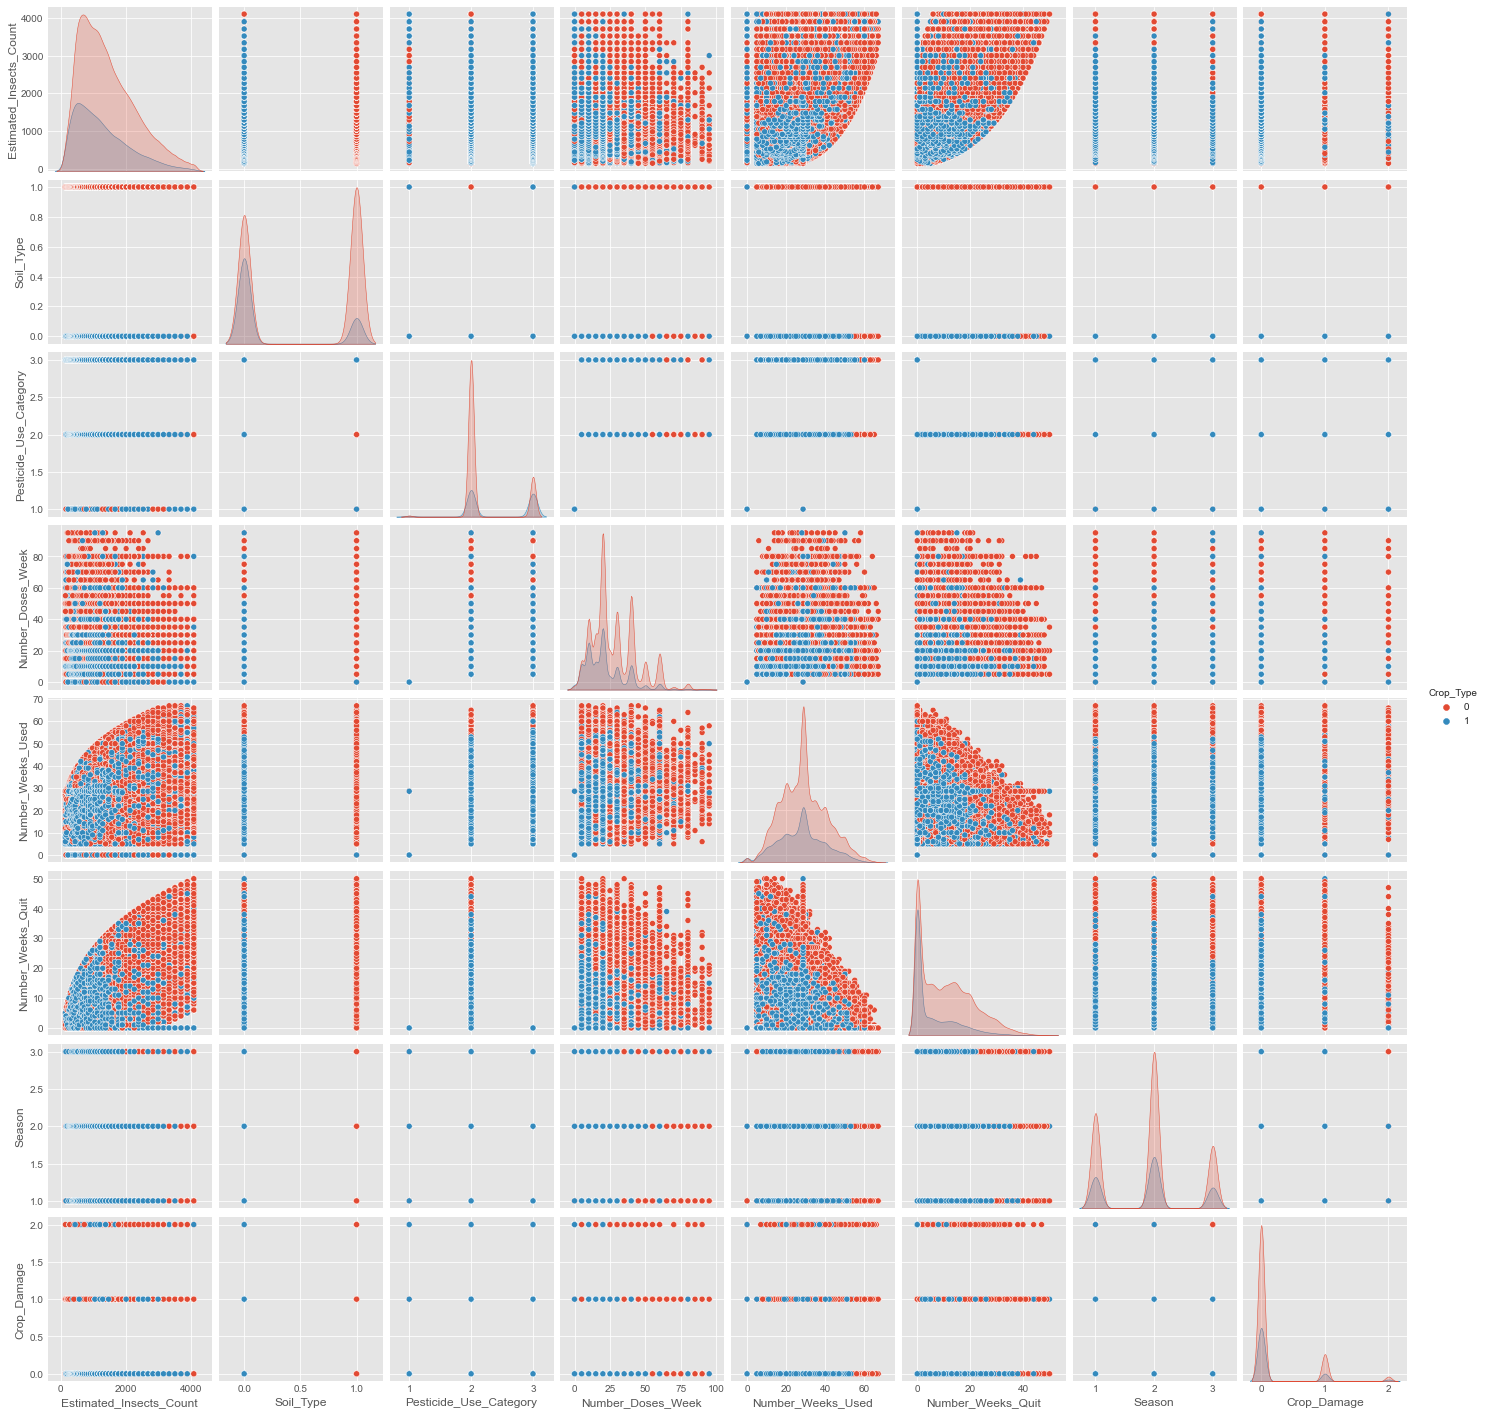

In [55]:
sns.pairplot(data=df_train, hue='Crop_Type')
plt.show()

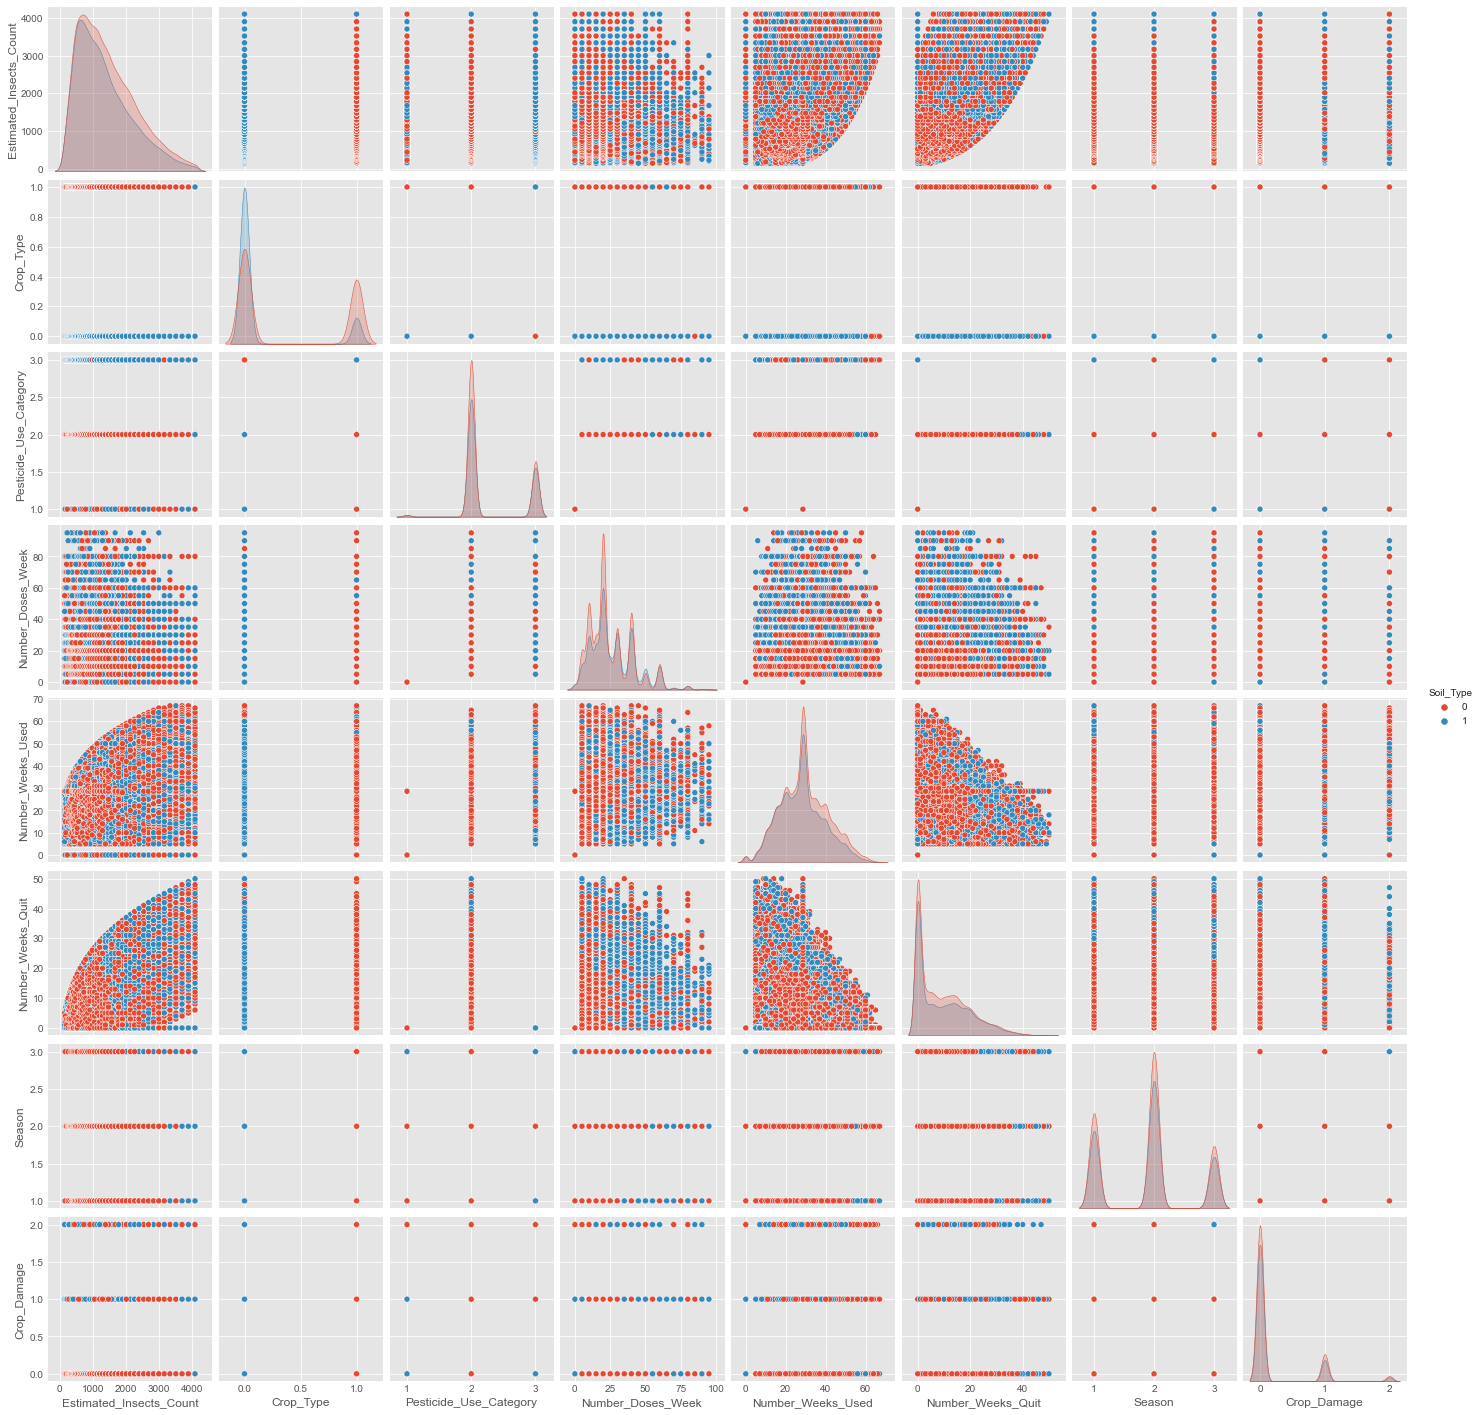

In [56]:
sns.pairplot(data=df_train, hue='Soil_Type')
plt.show()

<AxesSubplot:xlabel='Number_Weeks_Used', ylabel='Density'>

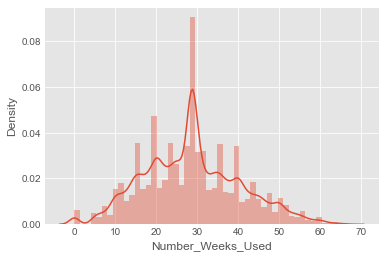

In [57]:
sns.distplot(df_train['Number_Weeks_Used'])

<AxesSubplot:xlabel='Estimated_Insects_Count', ylabel='Density'>

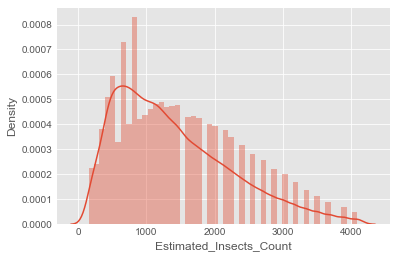

In [58]:
sns.distplot(df_train['Estimated_Insects_Count'])

<AxesSubplot:xlabel='Crop_Type', ylabel='Density'>

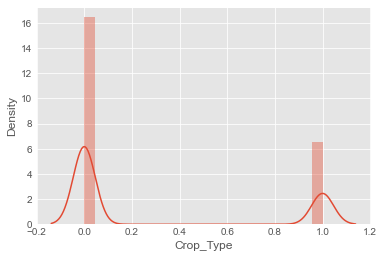

In [59]:
sns.distplot(df_train['Crop_Type'])

<AxesSubplot:xlabel='Soil_Type', ylabel='Density'>

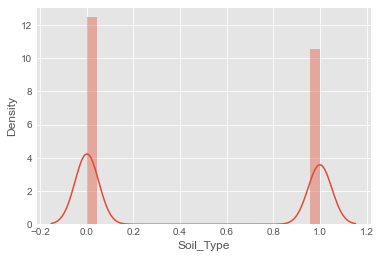

In [60]:
sns.distplot(df_train['Soil_Type'])

<AxesSubplot:xlabel='Pesticide_Use_Category', ylabel='Density'>

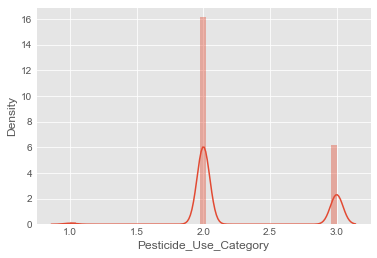

In [61]:
sns.distplot(df_train['Pesticide_Use_Category'])

<AxesSubplot:xlabel='Season', ylabel='Density'>

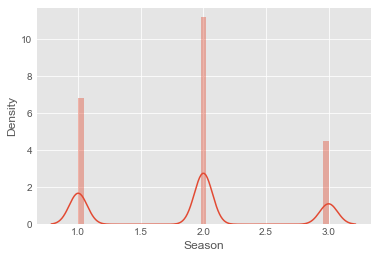

In [62]:
sns.distplot(df_train['Season'])

<AxesSubplot:xlabel='Crop_Damage', ylabel='Density'>

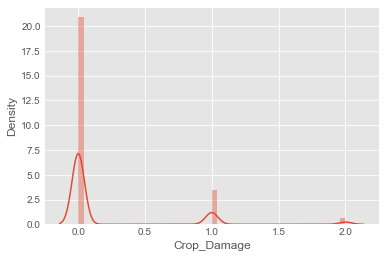

In [63]:
sns.distplot(df_train['Crop_Damage'])

In [64]:
corr = df_train.corr()
corr

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.412904,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.041679,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.066420,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.326233,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.119778,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.412904,-0.041679,-0.066420,0.326233,0.119778,1.000000,-0.425763,0.004188,0.219621
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.425763,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004188,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.219621,-0.133117,-0.000184,1.000000


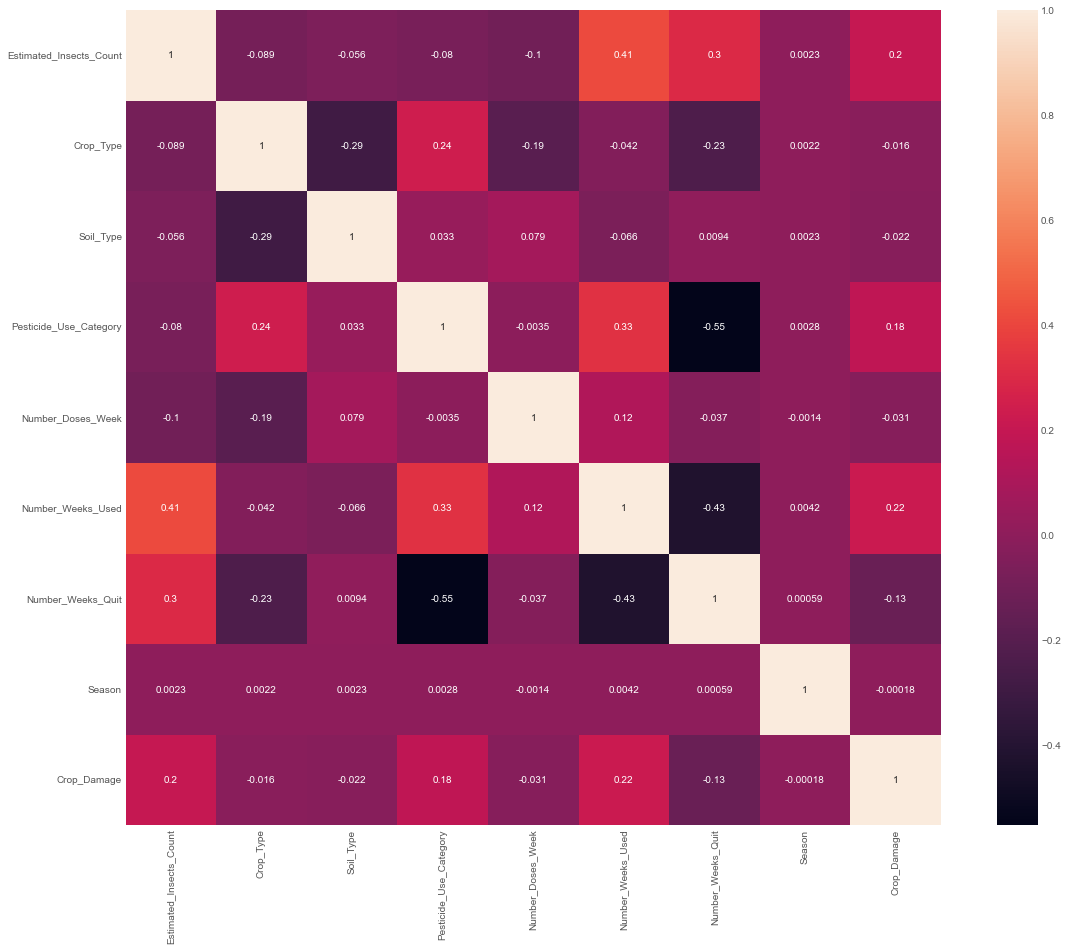

In [65]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,square=True)
plt.yticks(rotation=0)
plt.show()

In [66]:
corr=df_test.corr()
corr

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,0.020773,-0.339516,0.038259,-0.121168,0.491944,0.146441,0.023384
Crop_Type,0.020773,1.000000,0.063050,0.482378,-0.170014,0.062412,-0.390935,0.020282
Soil_Type,-0.339516,0.063050,1.000000,0.129857,0.057118,-0.139741,-0.191989,-0.069242
Pesticide_Use_Category,0.038259,0.482378,0.129857,1.000000,-0.010922,0.406020,-0.584312,0.015085
Number_Doses_Week,-0.121168,-0.170014,0.057118,-0.010922,1.000000,0.122996,0.009077,0.027197
Number_Weeks_Used,0.491944,0.062412,-0.139741,0.406020,0.122996,1.000000,-0.362582,0.018306
Number_Weeks_Quit,0.146441,-0.390935,-0.191989,-0.584312,0.009077,-0.362582,1.000000,0.030281
Season,0.023384,0.020282,-0.069242,0.015085,0.027197,0.018306,0.030281,1.000000


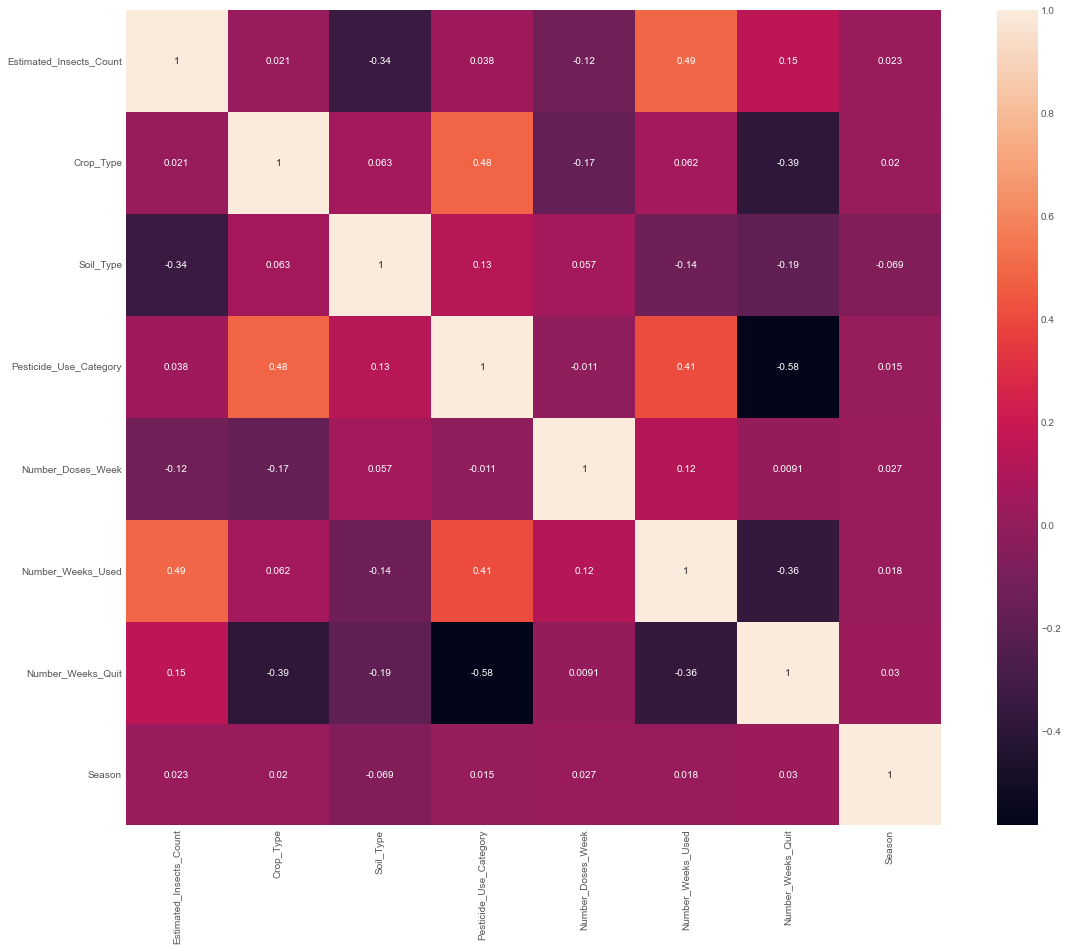

In [67]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

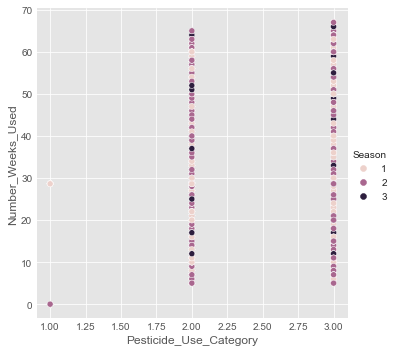

In [68]:
sns.relplot(x='Pesticide_Use_Category', y='Number_Weeks_Used', hue='Season', data=df_train)

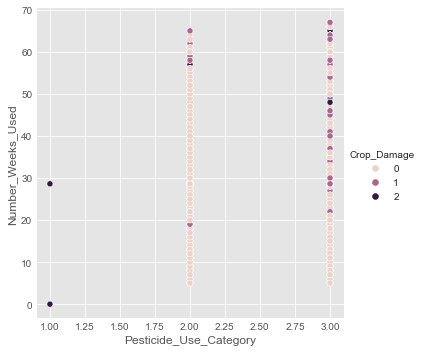

In [69]:
sns.relplot(x='Pesticide_Use_Category', y='Number_Weeks_Used', hue='Crop_Damage', data=df_train)

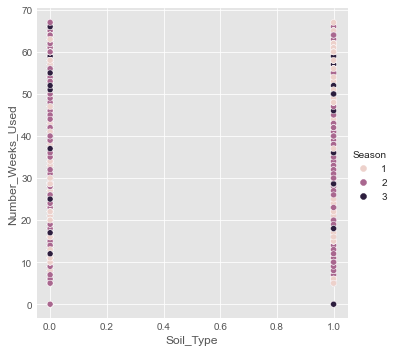

In [70]:
sns.relplot(x='Soil_Type', y='Number_Weeks_Used', hue='Season', data=df_train)

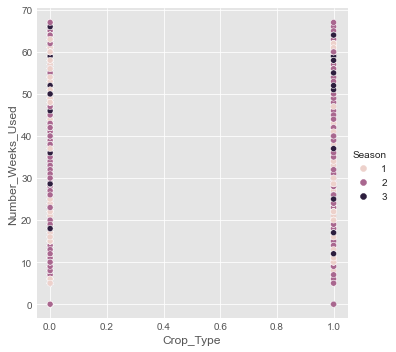

In [71]:
sns.relplot(x='Crop_Type', y='Number_Weeks_Used', hue='Season', data=df_train)

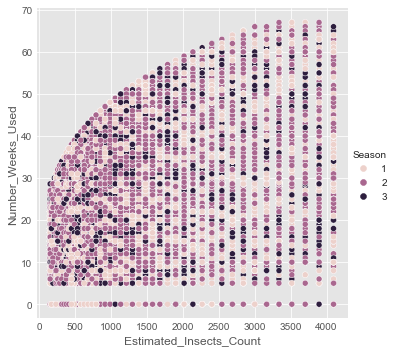

In [72]:
sns.relplot(x='Estimated_Insects_Count', y='Number_Weeks_Used', hue='Season', data=df_train)

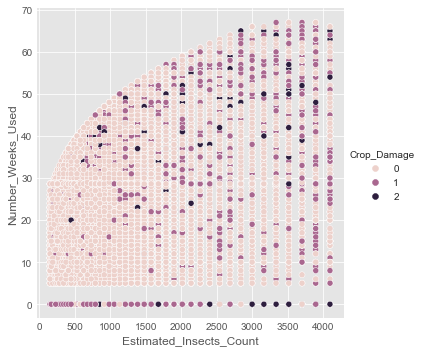

In [73]:
sns.relplot(x='Estimated_Insects_Count', y='Number_Weeks_Used', hue='Crop_Damage', data=df_train)

# BUILDING A MODEL

In [74]:
df_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [75]:
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,29.033333,0,2
1,F00000007,410,1,1,1,0,0.000000,0,2
2,F00000011,626,1,0,1,0,0.000000,0,2
3,F00000013,731,1,0,1,0,0.000000,0,2
4,F00000014,789,0,0,1,0,0.000000,0,1


In [76]:
print('df_train_columns')
print(df_train.columns)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('df_test_columns')
print(df_test.columns)

df_train_columns
Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
df_test_columns
Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')


In [77]:
x = df_train.drop(['Number_Doses_Week', 'Number_Weeks_Quit'], axis=1)

In [78]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Estimated_Insects_Count'] = le.fit_transform(df_train['Estimated_Insects_Count'])
df_train['Crop_Type'] = le.fit_transform(df_train['Crop_Type'])
df_train['Soil_Type'] = le.fit_transform(df_train['Soil_Type'])
df_train['Pesticide_Use_Category'] = le.fit_transform(df_train['Pesticide_Use_Category'])
df_train['Number_Weeks_Used'] = le.fit_transform(df_train['Number_Weeks_Used'])
df_train['Season'] = le.fit_transform(df_train['Season'])
df_train['Crop_Damage'] = le.fit_transform(df_train['Crop_Damage'])

In [79]:
df_train.describe

<bound method NDFrame.describe of               ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0      F00000001                        4          1          0   
1      F00000003                        5          1          0   
2      F00000004                        9          1          0   
3      F00000005                        9          1          1   
4      F00000006                       13          1          0   
...          ...                      ...        ...        ...   
88853  F00155935                       63          1          0   
88854  F00155938                       65          1          0   
88855  F00155939                       65          1          0   
88856  F00155942                       66          1          0   
88857  F00155945                       67          1          0   

       Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                           0                  0                  0   
1                  

In [80]:
df_train.head(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,4,1,0,0,0,0,0,0,0
1,F00000003,5,1,0,0,0,0,0,1,1
2,F00000004,9,1,0,0,0,0,0,1,1
3,F00000005,9,1,1,0,0,0,0,1,1
4,F00000006,13,1,0,0,0,0,0,1,1


Modelling

In [81]:
X=df_train.drop('Number_Weeks_Used',axis=1)
y=df_train['Number_Weeks_Used']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(62200, 9)
(62200,)
(26658, 9)
(26658,)


In [82]:
df_train['Pesticide_Use_Category'].unique()

array([0, 2, 1], dtype=int64)

# Thank you
